In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input,GlobalMaxPooling1D,LSTM,Embedding
from tensorflow.keras.models import Model

In [3]:
df=pd.read_csv("/content/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['Category']=df['Category'].map({'ham':1,'spam':0})

In [5]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
X=df['Message'].copy()
Y=df['Category'].copy()

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [9]:
vocab_size=2000
tokenizer=Tokenizer(num_words=vocab_size,oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

sequence_train=tokenizer.texts_to_sequences(x_train)
sequence_test=tokenizer.texts_to_sequences(x_test)

In [14]:
word_index=tokenizer.word_index
V=len(word_index)
V

7496

In [19]:
x_training=pad_sequences(sequence_train)
T=x_training.shape[1]
T
x_testing=pad_sequences(sequence_test,maxlen=T)

In [20]:
D=20
M=15
y_test.size
x_training.shape

(3900, 162)

In [57]:
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(128,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

In [58]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
r=model.fit(x_training,y_train,validation_data=(x_testing,y_test),epochs=10)

Epoch 1/10
122/122 [==============================] - 3s 15ms/step - loss: 0.4512 - accuracy: 0.8605 - val_loss: 0.3918 - val_accuracy: 0.8660
Epoch 2/10
122/122 [==============================] - 1s 11ms/step - loss: 0.2575 - accuracy: 0.9041 - val_loss: 0.1128 - val_accuracy: 0.9767
Epoch 3/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0681 - accuracy: 0.9851 - val_loss: 0.0604 - val_accuracy: 0.9874
Epoch 4/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0391 - accuracy: 0.9915 - val_loss: 0.0537 - val_accuracy: 0.9862
Epoch 5/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0295 - accuracy: 0.9941 - val_loss: 0.0460 - val_accuracy: 0.9904
Epoch 6/10
122/122 [==============================] - 1s 11ms/step - loss: 0.0242 - accuracy: 0.9951 - val_loss: 0.0453 - val_accuracy: 0.9904
Epoch 7/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0219 - accuracy: 0.9959 - val_loss: 0.0481 - val_accuracy: 0.9898

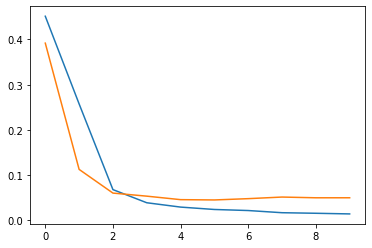

In [60]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')

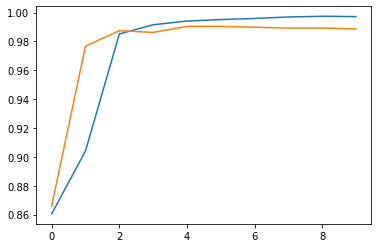

In [61]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')

In [62]:
def processing(test_sentence):
  x=tokenizer.texts_to_sequences(test_sentence)
  x=pad_sequences(x,maxlen=T)
  return x
input='Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C'
new_sentence=[input]
x=processing(new_sentence)
result=model.predict(x)
if np.round(result)==1:
  print("Bu email spam emas")
else:
  print("Bu email spam.")


Bu email spam.
